In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn import metrics
pd.set_option('display.max_columns', 90)

<h1><center>WHITE WINE LASSO REGRESSION</center></h1>

Importación de los datos
---

In [2]:
wines = pd.read_csv("T1_white_wine.csv");wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018
...,...,...,...,...,...,...,...,...
3759,Sauvignon Blanc 2019,New Zealand,Marlborough,Oyster Bay,4.0,4423,10.66,2019
3760,Vinho Verde Sweet N.V.,Portugal,Vinho Verde,Casal Garcia,4.0,4609,5.05,N.V.
3761,Sauvignon Blanc 2018,New Zealand,Marlborough,Kim Crawford,3.9,5105,14.90,2018
3762,Sauvignon Blanc 2019,New Zealand,Marlborough,Hans Greyl,4.2,5817,7.75,2019


### Descripción de las variables

1. Name : Nombre del vino rojo.
2. Country : País de orígen. 
3. Region : Region de donde es originario el vino. 
4. Winery : Empresa que produce el vino.
5. Rating : Calificación obtenida por el vino y concedido por algún catador. 
6. NumberofRatings : Número de personas que han calificado al vino.
7. Price : Precio de venta.
8. Year : Año de producción. 

### Tipo de datos

Hay que notar que __Year__ tendría que ser una variable entera, puesto que por simple inspección los años estan dados en representación numérica. Es necesario checar qué valor difiere con lo anterior dicho. 

In [3]:
wines.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
dtype: object

### Información general

Información general sobre variables númericas.

In [4]:
wines.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,3764.0,3.817906,0.266827,2.20,3.60,3.80,4.000,4.90
NumberOfRatings,3764.0,187.567216,1071.470441,25.00,43.00,77.00,174.250,62980.00
Price,3764.0,20.620319,30.928415,3.74,9.26,13.15,20.865,681.37


### Valores NaN o Nulos

Ningún valor nulo o vacío

In [5]:
wines.isna().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
dtype: int64

### Registros por columna

#### Name

In [6]:
wines.Name.value_counts()

Chardonnay 2018                               78
Sauvignon Blanc 2019                          66
Sauvignon Blanc 2018                          51
Chardonnay 2017                               41
Riesling Trocken 2018                         27
                                              ..
Capellanía 2015                                1
Cuvée Bérengère Chardonnay - Viognier 2018     1
Lahn Sauvignon 2019                            1
Kalk & Stein 2017                              1
Sauvignon Côtes de Gascogne 2018               1
Name: Name, Length: 3040, dtype: int64

#### Country

In [7]:
wines.Country.value_counts()

Germany           888
Italy             792
France            653
South Africa      296
Spain             256
Austria           243
United States     135
Chile              99
New Zealand        94
Portugal           89
Australia          67
Argentina          56
Romania            12
Switzerland        11
Greece             10
Hungary            10
Slovenia            9
Georgia             8
Israel              8
Brazil              6
Luxembourg          5
Croatia             4
Moldova             3
Czech Republic      2
China               2
Turkey              2
Canada              1
Slovakia            1
Uruguay             1
Lebanon             1
Name: Country, dtype: int64

#### Region

In [8]:
wines.Region.value_counts()

Pfalz                       214
Mosel                       197
Rheinhessen                 134
Südtirol - Alto Adige       133
Rheingau                    107
                           ... 
Rully 1er Cru 'Rabourcé'      1
Tumbarumba                    1
Algarve                       1
Calatayud                     1
Spoleto                       1
Name: Region, Length: 457, dtype: int64

#### Winery

In [9]:
wines.Winery.value_counts()

Markus Molitor        61
Von Winning           34
Wittmann              29
Emrich-Schönleber     23
Joseph Drouhin        23
                      ..
Michel Torino          1
João Clara             1
Campo Alla Sughera     1
Villa Sparina          1
Les Dauphins           1
Name: Winery, Length: 1412, dtype: int64

#### Rating

In [10]:
wines.Rating.value_counts().sort_index(ascending = False)

4.9      1
4.8      1
4.7      1
4.6      7
4.5     31
4.4     41
4.3    100
4.2    197
4.1    339
4.0    393
3.9    572
3.8    638
3.7    482
3.6    411
3.5    246
3.4    159
3.3     74
3.2     43
3.1     15
3.0      5
2.9      2
2.8      3
2.7      1
2.6      1
2.2      1
Name: Rating, dtype: int64

#### NumberOfRatings

In [11]:
wines.NumberOfRatings.value_counts(ascending = False)

29      67
26      60
40      59
27      59
30      58
        ..
1248     1
1254     1
1286     1
1332     1
4082     1
Name: NumberOfRatings, Length: 625, dtype: int64

#### Price

In [12]:
wines.Price.value_counts()

9.90     43
8.90     38
15.50    31
9.50     31
18.90    30
         ..
60.41     1
6.26      1
22.37     1
10.28     1
33.25     1
Name: Price, Length: 1325, dtype: int64

#### Year

N.V es una variable no entera y debe ser reemplazada por un valor más apropiado. Dado que los registros con N.V (No Value) son 5, en aras de no inflar ni la moda ni la media, procederé a borrarlos.

In [13]:
wines.Year.value_counts().sort_index(ascending = False)

N.V.       5
2020       2
2019     588
2018    1440
2017     787
2016     484
2015     250
2014      85
2013      42
2012      26
2011      24
2010       5
2009       2
2008       3
2007       3
2006       5
2005       4
2004       2
2003       3
1999       2
1998       1
1993       1
Name: Year, dtype: int64

In [14]:
wines.drop(wines[wines["Year"] == "N.V."].index,inplace = True);wines
wines.reset_index()

,index,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018
...,...,...,...,...,...,...,...,...,...
3754,3757,Private Bin Sauvignon Blanc 2019,New Zealand,Marlborough,Villa Maria,4.1,4082,10.60,2019
3755,3758,Blanco (Verdejo) 2018,Spain,Rueda,Marqués de Riscal,3.7,4155,6.30,2018
3756,3759,Sauvignon Blanc 2019,New Zealand,Marlborough,Oyster Bay,4.0,4423,10.66,2019
3757,3761,Sauvignon Blanc 2018,New Zealand,Marlborough,Kim Crawford,3.9,5105,14.90,2018


Visualización de los datos
---

Existen 3035 nombres diferentes de vinos. No existe una representación (las hay) adecuada para este número de datos. Una gráfica de pastel o una gráfica de barras serían apropiadas si el número de nombres de vino fuera menor.

In [15]:
len(wines.Name.unique())

3035

### Country

Alemania, Italia y Francia dominan la lista con la cantidad de vinos producidos.

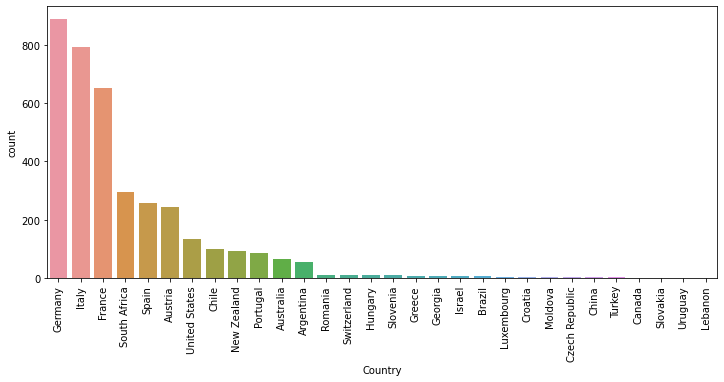

In [16]:
fig, ax = plt.subplots(figsize = [12,5])
plt.xticks(rotation = "vertical")
sns.countplot(wines.Country, order = wines.Country.value_counts().index)

### Region

Al igual que en el caso de names, se tienen muchos nombres de regiones diferentes y su visualización es díficil de representar por medio de una gráfica. En este caso, se graficará las 20 regiones con más número de registros.

In [17]:
len(wines.Region.unique())

456

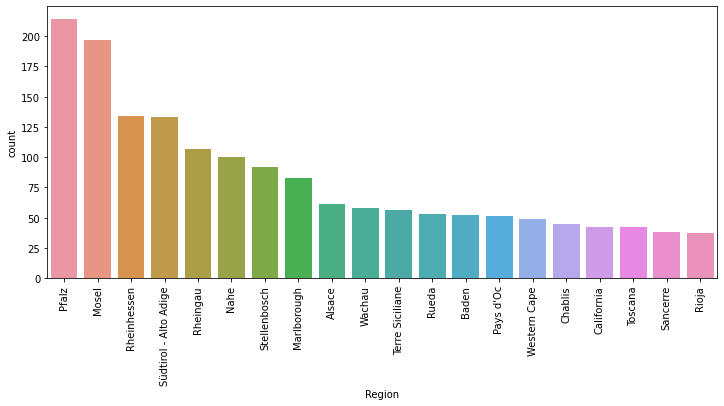

In [18]:
fig, ax = plt.subplots(figsize = [12,5])
plt.xticks(rotation = "vertical")
sns.countplot(wines.Region,order =wines.Region.value_counts().index[:20])

### Winery

El mismo caso que el nombre. Se graficarán solo las primeras 20 vinerías.

In [19]:
len(wines.Winery.unique())

1409

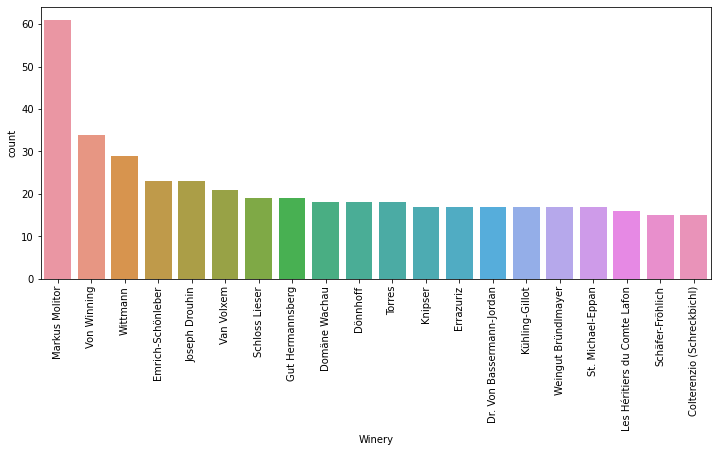

In [20]:
fig, ax = plt.subplots(figsize = [12,5])
plt.xticks(rotation = "vertical")
sns.countplot(wines.Winery,order =wines.Winery.value_counts().index[:20])

### Rating

El kernel de la representación de los datos, si bien no es una campana exacta, podemos inferir que puede tender a tener un comportamiento normal. 

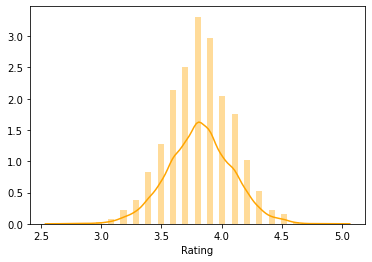

In [21]:
sns.distplot(wines.Rating, color = "orange")

### NumberOfRatings

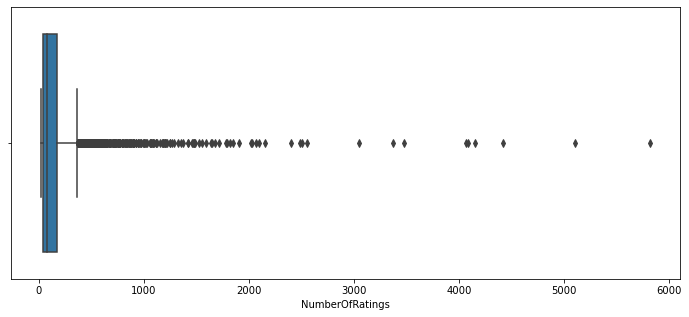

In [22]:
fig, ax = plt.subplots(figsize = [12,5])
sns.boxplot(wines.NumberOfRatings)

### Price

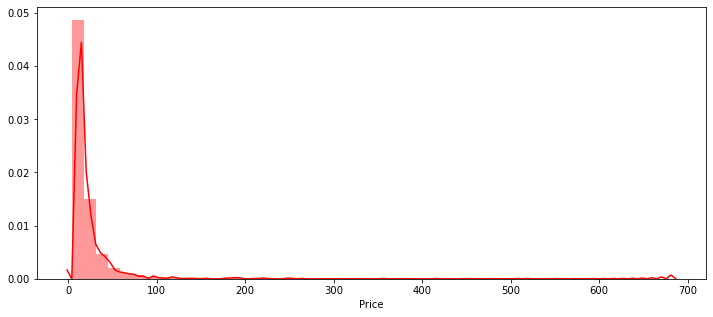

In [23]:
fig, ax = plt.subplots(figsize = [12,5])
sns.distplot(wines.Price, color = "red")

#### Price por país.
Los valores más extremos los presenta Francia, le precede Alemania en segundo lugar e Italia. Estos concuerdan con el número de producción de vinos.

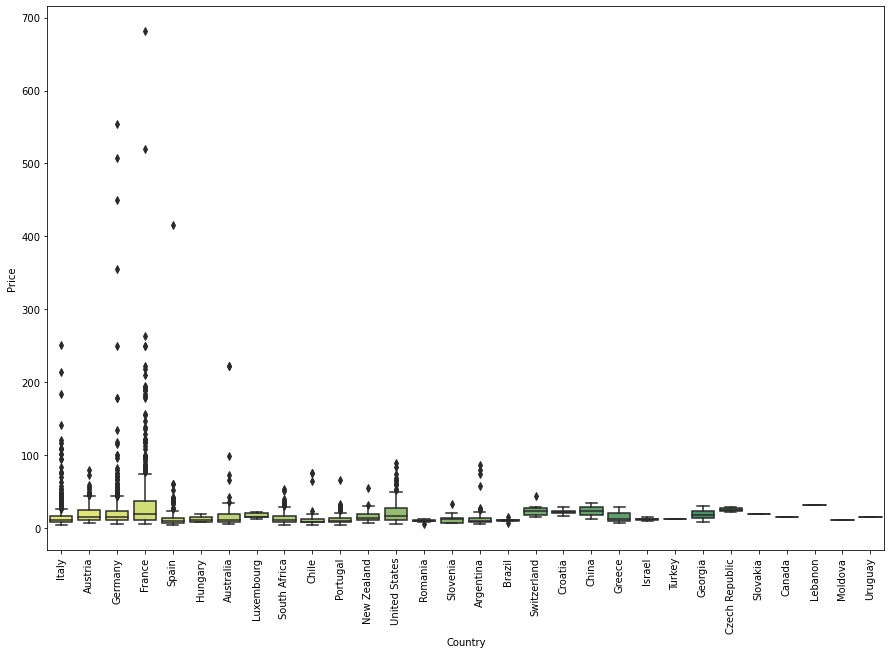

In [24]:
fig, ax = plt.subplots(figsize = [15,10])
plt.xticks(rotation = "vertical")
sns.boxplot(y = "Price", x = "Country", data = wines, palette = "summer_r" ) 

### Year

Hay muy escoasos registros de 1993 a 2010, lo cual puede generar problemas para el modelo de regresión. La mayoría de vinos en la lista fueron producidos de 2015 a 2019.

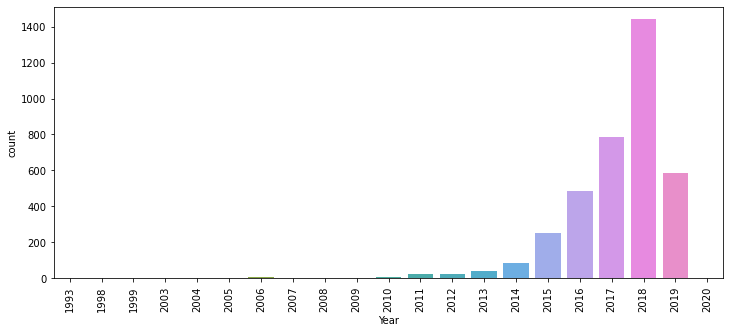

In [25]:
fig, ax = plt.subplots(figsize = [12,5])
plt.xticks(rotation = "vertical")
sns.countplot(wines.Year, order = wines.Year.value_counts().sort_index().index )

Data Wrangling / Feature Engineering
---
[Esta página](https://www.famigliacecchi.it/en/news/which-factors-determine-the-price-of-wine/190) puede resultar bastante útil. A pesar de que me deje guiar más por lo que sé y por lo que he escuchado, tome en cuenta algunos puntos mencinados ahí.

### Name

Para realizar una regresión lineal, es necesario que se cumpla el supuesto de homocedasticidad. Trataré de probar si existe tomando en cuenta la variable _Name_

#### [Test de Levene](https://en.wikipedia.org/wiki/Levene%27s_test)


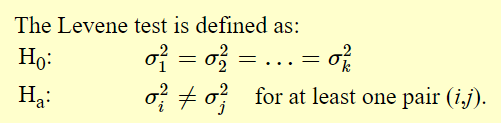

In [26]:
wrang1 = wines.Name.value_counts().to_frame()
wrang1.head(3)

,Name
Chardonnay 2018,78
Sauvignon Blanc 2019,66
Sauvignon Blanc 2018,51


Separé por vino cada registro y guardaré sus respectivos precios.

In [27]:
dic = {}
for vino in wrang1.index:
    dic[vino] = wines[wines["Name"] == vino].Price.values   

Se aplicará la prueba de Levene para encontrar si existe homocedasticidad o no.

In [28]:
from scipy.stats import levene
stat,p = levene(*dic.values())
p

0.9999999999999999

__DADO QUE EL P-VALUE ES MAYOR AL .05, SE TIENE SUFICIENTE PRUEBA ESTADÍSTICA PARA ACEPTAR LA HIPÓTESIS NULA, ESTA ES, LAS VARIANZAS DE LOS DIFERENTES NOMBRES DE LOS VINOS SON IGUALES__<br>
Por lo tanto, vale la pena conservar esta variable para el análisis de regresión.

Procederé a codificarlas con get_dummies.

In [29]:
d_Name = pd.get_dummies(wines.Name, drop_first = True)
d_Name

,'Rosso & Bianco' Chardonnay 2017,1000-Eimerberg Riesling Federspiel 2018,1000-Eimerberg Smaragd Riesling 2018,101 Rangs Pouilly-Fumé 2016,101 Riesling 2018,12 e Mezzo Malvasia del Salento 2019,120 Reserva Especial Chardonnay 2018,1300 Chardonnay 2019,1300 Torrontés 2019,15 Pinot Grigio 2017,15 Pinot Grigio 2018,1769 Clos Venturi Blanc 2018,1791 Sauvignon Blanc 2019,1851 Reserva Chardonnay 2017,21 Gables Chenin Blanc 2018,50 HL Riesling Spätlese Trocken 2015,7 Terroirs 2019,875m Finca Carbonera Chardonnay 2018,9 Riesling 2018,A Le Grand 2017,AVETA Sauvignon Blanc 2016,Abbazia di Rosazzo 2013,Achenio Bolgheri Bianco 2015,Aconcagua Costa Chardonnay 2014,Aconcagua Costa Sauvignon Blanc 2017,Adobe Chardonnay (Reserva) 2019,Adobe Sauvignon Blanc (Reserva) 2019,Adorato Appassionato Bianco 2018,Adrianna Vineyard White Bones Chardonnay 2016,Adrianna Vineyard White Stones Chardonnay 2012,Adrianna Vineyard White Stones Chardonnay 2015,Adrianna Vineyard White Stones Chardonnay 2017,Adènzia Bianco 2018,Afix Riesling 2015,Agneau Bordeaux Blanc 2018,Aigle les Murailles Blanc 2019,Aile d'Argent Blanc Bordeaux 2016,Aimery Chardonnay 2018,Airén Semidulce 2018,Akkurat Weiss 2018,Alandra Branco 2018,Alb de Petro Vaselo 2017,Alb de Petro Vaselo 2018,Albaclara Sauvignon Blanc 2018,Albarino 2018,...,Wolfer Sonnenlay Riesling Kabinett 2017,Wunderwerk Riesling 2016,Würzburger Stein Riesling Trocken 2018,Würzburger Stein Silvaner GG 2016,Würzburger Stein Silvaner Trocken 2018,Xarel-lo 2018,Yattarna Chardonnay (BIN 144) 2015,Yattarna Chardonnay (BIN 144) 2016,Zakynthino 2016,Zapallar Coast Sauvignon Blanc 2019,Zelen 2015,Zellertal Riesling 2018,Zeltinger Himmelreich Riesling Kabinett 2015,Zeltinger Himmelreich Riesling Kabinett 2016,Zeltinger Himmelreich Riesling Kabinett 2017,Zeltinger Himmelreich Riesling Kabinett 2018,Zeltinger Riesling Kabinett Trocken 2018,Zeltinger Schlossberg Riesling Auslese** 2007,Zeltinger Schlossberg Riesling Trockenbeerenauslese 2006,Zeltinger Sonnenuhr Riesling Auslese*** 2003,Zeltinger Sonnenuhr Riesling Auslese*** 2014,Zeltinger Sonnenuhr Riesling Auslese*** 2015,Zeltinger Sonnenuhr Riesling Auslese*** 2018,Zeltinger Sonnenuhr Riesling Kabinett 2015,Zeltinger Sonnenuhr Riesling Kabinett 2016,Zeltinger Sonnenuhr Riesling Spätlese 2014,Zeltinger Sonnenuhr Riesling Spätlese 2015,Zeltinger Sonnenuhr Riesling Spätlese 2016,Zeltinger Sonnenuhr Riesling Spätlese 2018,Zieregg Morillon 2017,Zieregg Sauvignon Blanc 2016,Zieregg Sauvignon Blanc 2017,Zöbing Riesling 2018,de Vite 2019,Éo Blanc 2018,Ölberg Riesling 2016,Ölberg Riesling 2017,Ürziger Würzgarten Riesling Auslese 2015,Ürziger Würzgarten Riesling Kabinett 2015,Ürziger Würzgarten Riesling Kabinett 2016,Ürziger Würzgarten Riesling Spätlese 2015,Ürziger Würzgarten Riesling Spätlese 2016,Ürziger Würzgarten Riesling Spätlese 2017,Ευχές (Wishes) 2015,Μαλαγουζιά (Malagouziá) 2017
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

### Country
Se aplicará el mismo test de Levene para ver que tan relevante es esta variable con relación a los precios.

In [30]:
wrang2 = wines.Country.value_counts().to_frame()
dic2 = {}
for vino in wrang2.index:
    dic2[vino] = wines[wines["Country"] == vino].Price.values   

In [31]:
stat,p = levene(*dic2.values())
p

7.831462749337463e-18

__DADO QUE EL P-VALUE ES MENOR A .05, SE TIENE SUFICIENTE PRUEBA ESTADÍSTICA PARA RECHAZAR LA HIPÓTESIS NULA, ESTO ES, LAS VARIANZAS DE LOS PRECIOS DE LOS DIFERENTES PAISES SON DISTINTOS__<br>
Por lo tanto, no vale la pena conservar esta variable para el análisis de regresión.

### Region

In [32]:
wrang3 = wines.Region.value_counts().to_frame()
dic3 = {}
for vino in wrang3.index:
    dic3[vino] = wines[wines["Region"] == vino].Price.values 

In [33]:
stat,p = levene(*dic3.values())
p

9.341001570713393e-30

__DADO QUE EL P-VALUE ES MENOR A .05, SE TIENE SUFICIENTE PRUEBA ESTADÍSTICA PARA RECHAZAR LA HIPÓTESIS NULA, ESTO ES, LAS VARIANZAS DE LOS PRECIOS DE LAS DIFERENTES REGIONES SON DISTINTOS__<br>
Por lo tanto, no vale la pena conservar esta variable para el análisis de regresión.

### Winery

In [34]:
wrang4 = wines.Winery.value_counts().to_frame()
dic4 = {}
for vino in wrang4.index:
    dic4[vino] = wines[wines["Winery"] == vino].Price.values 

In [35]:
stat,p = levene(*dic4.values())
p

7.085293193347315e-05

__DADO QUE EL P-VALUE ES MENOR A .05, SE TIENE SUFICIENTE PRUEBA ESTADÍSTICA PARA RECHAZAR LA HIPÓTESIS NULA, ESTO ES, LAS VARIANZAS DE LOS PRECIOS DE LAS DIFERENTES VINERIAS SON DISTINTOS__<br>
Por lo tanto, no vale la pena conservar esta variable para el análisis de regresión.

### NumberOfRatings

El coeficiente de correlación lineal entre ambas variables es: -0.0502


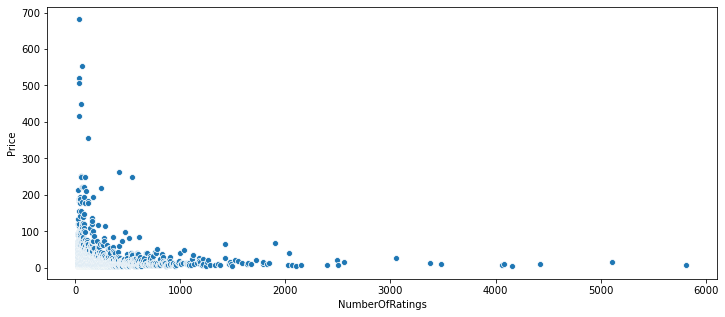

In [36]:
print("El coeficiente de correlación lineal entre ambas variables es:",round(np.corrcoef(wines.NumberOfRatings,wines.Price)[0,1],4))
fig, ax = plt.subplots(figsize = [12,5])
sns.scatterplot(x = "NumberOfRatings", y = "Price", data = wines)

El coeficiente de correlación lineal es muy cercano a cero. Además, con ayuda de la gráfica, se puede ver que no existe una realción lineal que indique la importancia de esta variable para el modelo de regresión.

### Year

Primero, necesito transformar los datos de a columna a enteros.

In [37]:
wines.Year = wines.Year.astype("int64")

El coeficiente de correlación lineal entre ambas variables es: -0.37


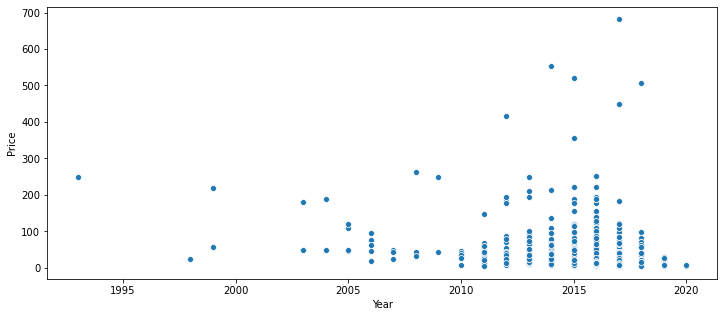

In [38]:
print("El coeficiente de correlación lineal entre ambas variables es:",round(np.corrcoef(wines.Year,wines.Price)[0,1],4))
fig, ax = plt.subplots(figsize = [12,5])
sns.scatterplot(x = "Year", y = "Price", data = wines)

La columan _Year_ puede ser tratada más bien como una variable categórica.

In [39]:
wrang5 = wines.Year.value_counts().to_frame()
dic5 = {}
for vino in wrang5.index:
    dic5[vino] = wines[wines["Year"] == vino].Price.values 

In [40]:
stat,p = levene(*dic5.values())
p

9.039128140563332e-59

__DADO QUE EL P-VALUE ES MENOR A .05, SE TIENE SUFICIENTE PRUEBA ESTADÍSTICA PARA RECHAZAR LA HIPÓTESIS NULA, ESTO ES, LAS VARIANZAS DE LOS PRECIOS DE LOS DIFERENTES AÑOS SON DISTINTOS__<br>
Por lo tanto, no vale la pena conservar esta variable para el análisis de regresión.

### Rating

Esta variable tiene un coeficiente de correlación aceptable para ser considerado dentro del modelo.

El coeficiente de correlación lineal entre ambas variables es: 0.4657


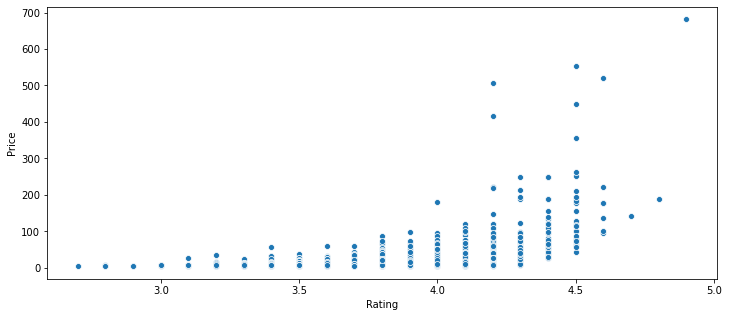

In [41]:
print("El coeficiente de correlación lineal entre ambas variables es:",round(np.corrcoef(wines.Rating,wines.Price)[0,1],4))
fig, ax = plt.subplots(figsize = [12,5])
sns.scatterplot(x = "Rating", y = "Price", data = wines)

### DataFrame FINAL

In [42]:
Final = pd.concat([d_Name,wines[["Rating","Price"]]], axis = 1)
Final.dropna(inplace = True)
Final.reset_index(inplace=True, drop = True)
Final

,'Rosso & Bianco' Chardonnay 2017,1000-Eimerberg Riesling Federspiel 2018,1000-Eimerberg Smaragd Riesling 2018,101 Rangs Pouilly-Fumé 2016,101 Riesling 2018,12 e Mezzo Malvasia del Salento 2019,120 Reserva Especial Chardonnay 2018,1300 Chardonnay 2019,1300 Torrontés 2019,15 Pinot Grigio 2017,15 Pinot Grigio 2018,1769 Clos Venturi Blanc 2018,1791 Sauvignon Blanc 2019,1851 Reserva Chardonnay 2017,21 Gables Chenin Blanc 2018,50 HL Riesling Spätlese Trocken 2015,7 Terroirs 2019,875m Finca Carbonera Chardonnay 2018,9 Riesling 2018,A Le Grand 2017,AVETA Sauvignon Blanc 2016,Abbazia di Rosazzo 2013,Achenio Bolgheri Bianco 2015,Aconcagua Costa Chardonnay 2014,Aconcagua Costa Sauvignon Blanc 2017,Adobe Chardonnay (Reserva) 2019,Adobe Sauvignon Blanc (Reserva) 2019,Adorato Appassionato Bianco 2018,Adrianna Vineyard White Bones Chardonnay 2016,Adrianna Vineyard White Stones Chardonnay 2012,Adrianna Vineyard White Stones Chardonnay 2015,Adrianna Vineyard White Stones Chardonnay 2017,Adènzia Bianco 2018,Afix Riesling 2015,Agneau Bordeaux Blanc 2018,Aigle les Murailles Blanc 2019,Aile d'Argent Blanc Bordeaux 2016,Aimery Chardonnay 2018,Airén Semidulce 2018,Akkurat Weiss 2018,Alandra Branco 2018,Alb de Petro Vaselo 2017,Alb de Petro Vaselo 2018,Albaclara Sauvignon Blanc 2018,Albarino 2018,...,Würzburger Stein Riesling Trocken 2018,Würzburger Stein Silvaner GG 2016,Würzburger Stein Silvaner Trocken 2018,Xarel-lo 2018,Yattarna Chardonnay (BIN 144) 2015,Yattarna Chardonnay (BIN 144) 2016,Zakynthino 2016,Zapallar Coast Sauvignon Blanc 2019,Zelen 2015,Zellertal Riesling 2018,Zeltinger Himmelreich Riesling Kabinett 2015,Zeltinger Himmelreich Riesling Kabinett 2016,Zeltinger Himmelreich Riesling Kabinett 2017,Zeltinger Himmelreich Riesling Kabinett 2018,Zeltinger Riesling Kabinett Trocken 2018,Zeltinger Schlossberg Riesling Auslese** 2007,Zeltinger Schlossberg Riesling Trockenbeerenauslese 2006,Zeltinger Sonnenuhr Riesling Auslese*** 2003,Zeltinger Sonnenuhr Riesling Auslese*** 2014,Zeltinger Sonnenuhr Riesling Auslese*** 2015,Zeltinger Sonnenuhr Riesling Auslese*** 2018,Zeltinger Sonnenuhr Riesling Kabinett 2015,Zeltinger Sonnenuhr Riesling Kabinett 2016,Zeltinger Sonnenuhr Riesling Spätlese 2014,Zeltinger Sonnenuhr Riesling Spätlese 2015,Zeltinger Sonnenuhr Riesling Spätlese 2016,Zeltinger Sonnenuhr Riesling Spätlese 2018,Zieregg Morillon 2017,Zieregg Sauvignon Blanc 2016,Zieregg Sauvignon Blanc 2017,Zöbing Riesling 2018,de Vite 2019,Éo Blanc 2018,Ölberg Riesling 2016,Ölberg Riesling 2017,Ürziger Würzgarten Riesling Auslese 2015,Ürziger Würzgarten Riesling Kabinett 2015,Ürziger Würzgarten Riesling Kabinett 2016,Ürziger Würzgarten Riesling Spätlese 2015,Ürziger Würzgarten Riesling Spätlese 2016,Ürziger Würzgarten Riesling Spätlese 2017,Ευχές (Wishes) 2015,Μαλαγουζιά (Malagouziá) 2017,Rating,Price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.8,5.65
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.3,44.90
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.2,33.25
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.9,8.99
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.9,8.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Separar los datos
---

In [43]:
x_train, x_test, y_train, y_test = train_test_split(Final.drop(columns = "Price"), 
                                                    Final.Price, 
                                                    test_size = 0.2, 
                                                    random_state = 2)

Construir el modelo
---

In [44]:
la = LassoCV(alphas = None, cv = 10, max_iter =100000, normalize = True)
la.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [45]:
coeficientes = pd.Series(la.coef_, index = Final.drop(columns = "Price").columns) ; coeficientes

'Rosso & Bianco' Chardonnay 2017             -0.000000
1000-Eimerberg Riesling Federspiel 2018      -0.000000
1000-Eimerberg Smaragd Riesling 2018         -0.000000
101 Rangs Pouilly-Fumé 2016                   0.000000
101 Riesling 2018                            -0.000000
                                               ...    
Ürziger Würzgarten Riesling Spätlese 2016    -0.000000
Ürziger Würzgarten Riesling Spätlese 2017    -0.000000
Ευχές (Wishes) 2015                          -0.000000
Μαλαγουζιά (Malagouziá) 2017                  0.000000
Rating                                       37.781541
Length: 3035, dtype: float64

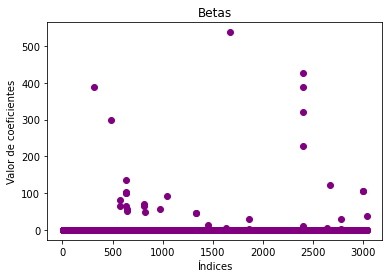

In [46]:
eje_X = range(1,len(la.coef_)+1,1)
plt.scatter(eje_X, la.coef_, color = 'purple')
plt.title('Betas')
plt.xlabel('Índices')
plt.ylabel('Valor de coeficientes')
plt.show()

### Interpretación de los coeficientes

#### Coeficientes que aportan al modelo

El modelo de regresión a seleccinado 38 _features_ de 3035 en total. Todos ellos tienen una relación positiva con la variable _Precio_. Como se menciono arriba, 37 de ellos son nombres de vinos y uno de ellos es el _Rating_.
1. La varaible que más aporta al modelo es "Montrachet Grand Cru Marquis de Laguiche 201" seguida por "Scharzhofberger Riesling Auslese 2014"
2. La variable Rating no es la más relevante para el modelo, pero si que supera a varios de los coeficientes en relevancia. 

In [47]:
print("El valor de la alpha encontrado por CV es de ",la.alpha_)
print("\nSE SELECCIONARON",len(coeficientes[coeficientes != 0]),"FEATURES",len(coeficientes),"\n")
coeficientes[coeficientes != 0]

El valor de la alpha encontrado por CV es de  0.027709139828532958

SE SELECCIONARON 38 FEATURES 3035 



Beaune 1er Cru 'Clos des Mouches' Blanc 2016                0.444731
Bâtard-Montrachet Grand Cru 2015                          387.666724
Chardonnay Uno 2012                                       298.798726
Clos Sainte Hune Riesling Alsace 2012                      64.474717
Clos Sainte Hune Riesling Alsace 2013                      81.894713
Corton-Charlemagne Grand Cru 1999                         100.728714
Corton-Charlemagne Grand Cru 2008                         135.344705
Corton-Charlemagne Grand Cru 2013                          65.434700
Corton-Charlemagne Grand Cru 2015                         103.218701
Corton-Charlemagne Grand Cru 2016                         101.578588
Corton-Charlemagne Grand Cru 2017                          55.674674
Corton-Charlemagne Grand Cru Blanc 2016                    50.404670
Ermitage Ex-Voto Blanc 2012                                64.222667
Ermitage de l'Orée 2003                                    71.834671
Ermitage de l'Orée 2004           

Predicciones
---

In [48]:
y_pred = la.predict(x_test)

Evalucación del modelo
---

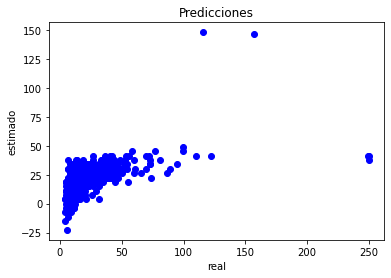

In [49]:
plt.scatter(y_test, y_pred, color = 'blue')
plt.title('Predicciones')
plt.xlabel('real')
plt.ylabel('estimado')
plt.show()

### $R^2$

In [50]:
r_cuadrada = r2_score(y_test,y_pred)
print('R^2 = ',round(r_cuadrada,3))

R^2 =  0.311


### $R^2$ adj

El modelo describre el 30% de la varianza total de la variable independiente con respecto a la variable dependiente. No es viable aplicar este modelo a los datos que se tienen. 

In [51]:
n = len(y_train)
p = 38#x_train.shape[1]
r_cuad_aj = 1 - (((1-r_cuadrada)*(n-1))/(n-p-1))

print('R^2_aj = ',round(r_cuad_aj,3))

R^2_aj =  0.302


### Distribución de errores
La distribución de errores tendría una distribución más cercana a la normal de no ser por la presencia de _outliers_ en los datos, como se puede distinguir claramente en la cola derecha de la distribución.

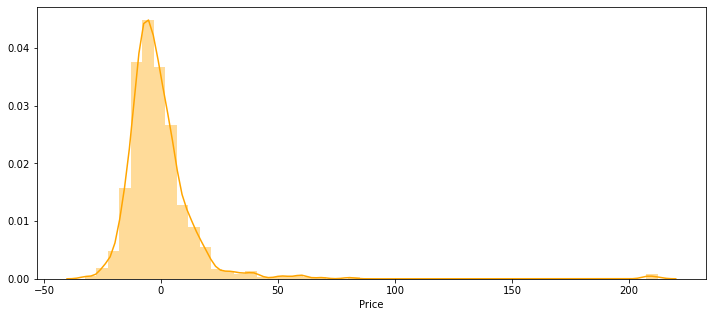

In [52]:
fig, ax = plt.subplots(figsize = [12,5])
sns.distplot((y_test-y_pred),bins=50, color = "Orange")

### Gráfica errores absolutos
Se puede percibir una relación significativa; los _outliers_ son más que claros.

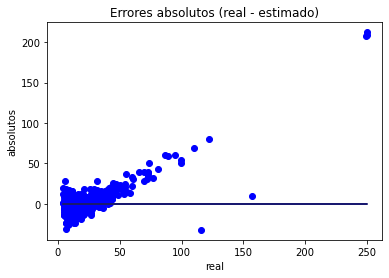

In [53]:
err_abs = y_test-y_pred

plt.scatter(y_test, err_abs, color = 'blue')
plt.plot(y_test, np.zeros(len(err_abs)), color = 'midnightblue')
plt.title('Errores absolutos (real - estimado)')
plt.xlabel('real')
plt.ylabel('absolutos')
plt.show()

### Gráfica errores relativos

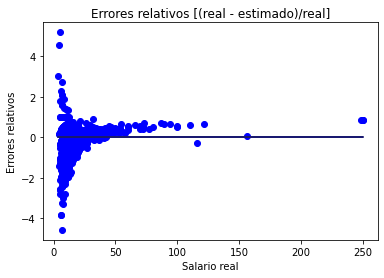

In [54]:
err_rel = err_abs/y_test

plt.scatter(y_test, err_rel, color = 'blue')
plt.plot(y_test, np.zeros(len(err_abs)), color = 'midnightblue') #Recta en Y = 0
plt.title('Errores relativos [(real - estimado)/real]')
plt.xlabel('Salario real')
plt.ylabel('Errores relativos')
plt.show()

### Otras métricas

In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

MAE: 9.724464189120315
MSE: 327.843446431243
RMSE: 18.106447648040824


Conclusión
---

A pesar de que los datos no son los mismos, se puede resaltar una mejoría bastante significativa entre el análisis con Ridge y el Lasso, pues su error cuadratico medio disminuyo a menos del doble.
En cuanto a este dataset y la aplicación de este modelo, considero que no es viable, pues su $R^2$ ajustada da indicios de poca descripción de los datos (30%). 

¿Qué pasa si selecciono todas las variables?
---
Para ello, ocuparé el mismo modelo con el mismo parámetro de regulación que en el análisis de arriba, con la diferencia de que incluiré todas las variables (excepto nombre, región, país y vineria).

In [57]:
X = wines[["Rating","NumberOfRatings","Year"]]
Y = wines["Price"]

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 3)

In [59]:
la2 = LassoCV(alphas = None, cv = 10, max_iter =100000, normalize = True)
la2.fit(X_train,Y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [60]:
coeficientes = pd.Series(la2.coef_, index = X.columns) ; coeficientes

Rating             48.105303
NumberOfRatings    -0.005098
Year               -4.476141
dtype: float64

In [65]:
Y_pred = la2.predict(X_test)

### $R^2$

In [66]:
r_cuadrada = r2_score(Y_test,Y_pred)
print('R^2 = ',round(r_cuadrada,3))

R^2 =  0.34


### $R^2$ adj

El modelo describre el 30% de la varianza total de la variable independiente con respecto a la variable dependiente. No es viable aplicar este modelo a los datos que se tienen. 

In [67]:
n = len(Y_train)
p = 3#x_train.shape[1]
r_cuad_aj = 1 - (((1-r_cuadrada)*(n-1))/(n-p-1))

print('R^2_aj = ',round(r_cuad_aj,3))

R^2_aj =  0.339


Conclusión 2
---
La $R^2$ ajustada mejora en un 3% si solo se toman los valores númericos del dataset. Aunque esto representa una mejoría, no es suficiente como para poder concluir que aplicar la regresión Lasso es una buena opción para este modelo. 